In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data from csv file to pandas DataFrame
insurance_dataset = pd.read_csv('insurance.csv')
insurance_dataset


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Visualising the Data

/var/folders/j0/57xjczq126s5bwqty5vprwsr0000gn/T/ipykernel_65158/329051264.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset.charges, color = 'b')
/var/folders/j0/57xjczq126s5bwqty5vprwsr0000gn/T/ipykernel_65158/329051264.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np

<Axes: xlabel='charges', ylabel='Density'>

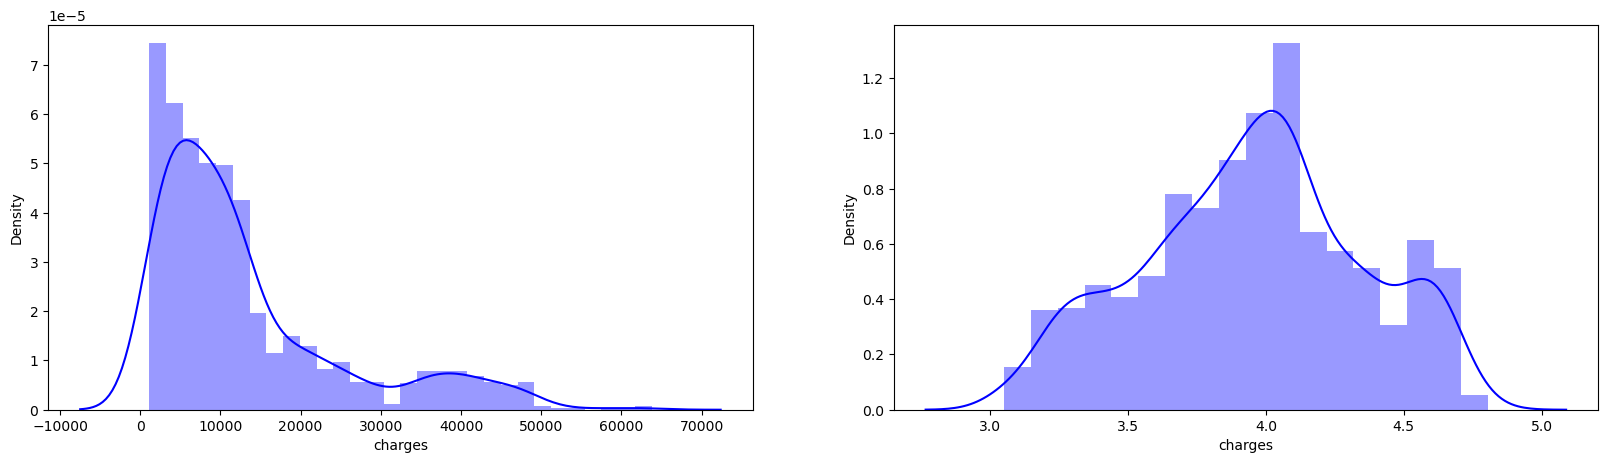

In [3]:
# Distribution of the charges
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(insurance_dataset.charges, color = 'b')

# Natural Log for approximately normal distribution
plt.subplot(1,2,2)
sns.distplot(np.log10(insurance_dataset.charges), color = 'b')

Visualizing distribution of numerical variables vs medical charges

/var/folders/j0/57xjczq126s5bwqty5vprwsr0000gn/T/ipykernel_65158/2376209247.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset.age, color = 'b').set_title('Distribution of age')
/var/folders/j0/57xjczq126s5bwqty5vprwsr0000gn/T/ipykernel_65158/2376209247.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

Text(0.5, 1.0, 'Distribution of BMI')

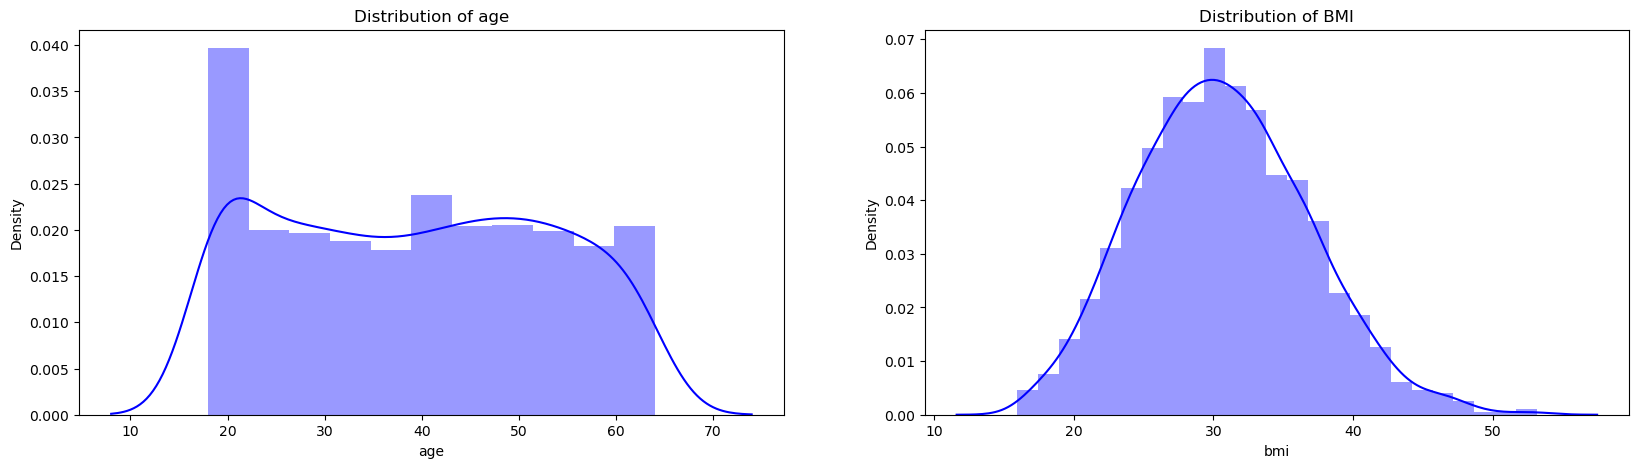

In [4]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(insurance_dataset.age, color = 'b').set_title('Distribution of age')

plt.subplot(1,2,2)
sns.distplot(insurance_dataset.bmi, color = 'b').set_title('Distribution of BMI')

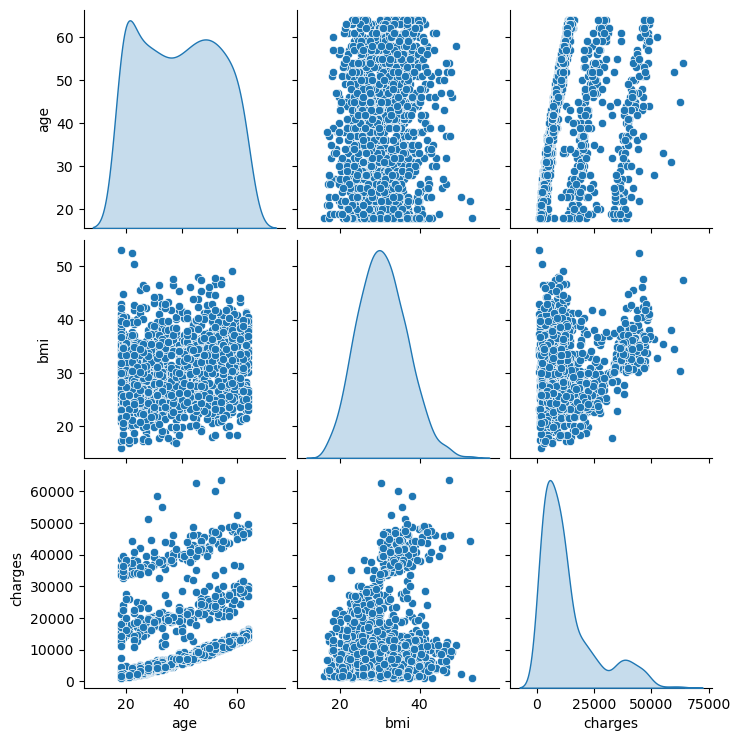

In [5]:
# Pairplot for Age, BMI, Charges
insurance_dataset_num = insurance_dataset[['age','bmi','charges']]
sns.pairplot(insurance_dataset_num, diag_kind = 'kde')
plt.show()

Visualizing categorical variables individually vs medical charges

<Axes: xlabel='smoker', ylabel='charges'>

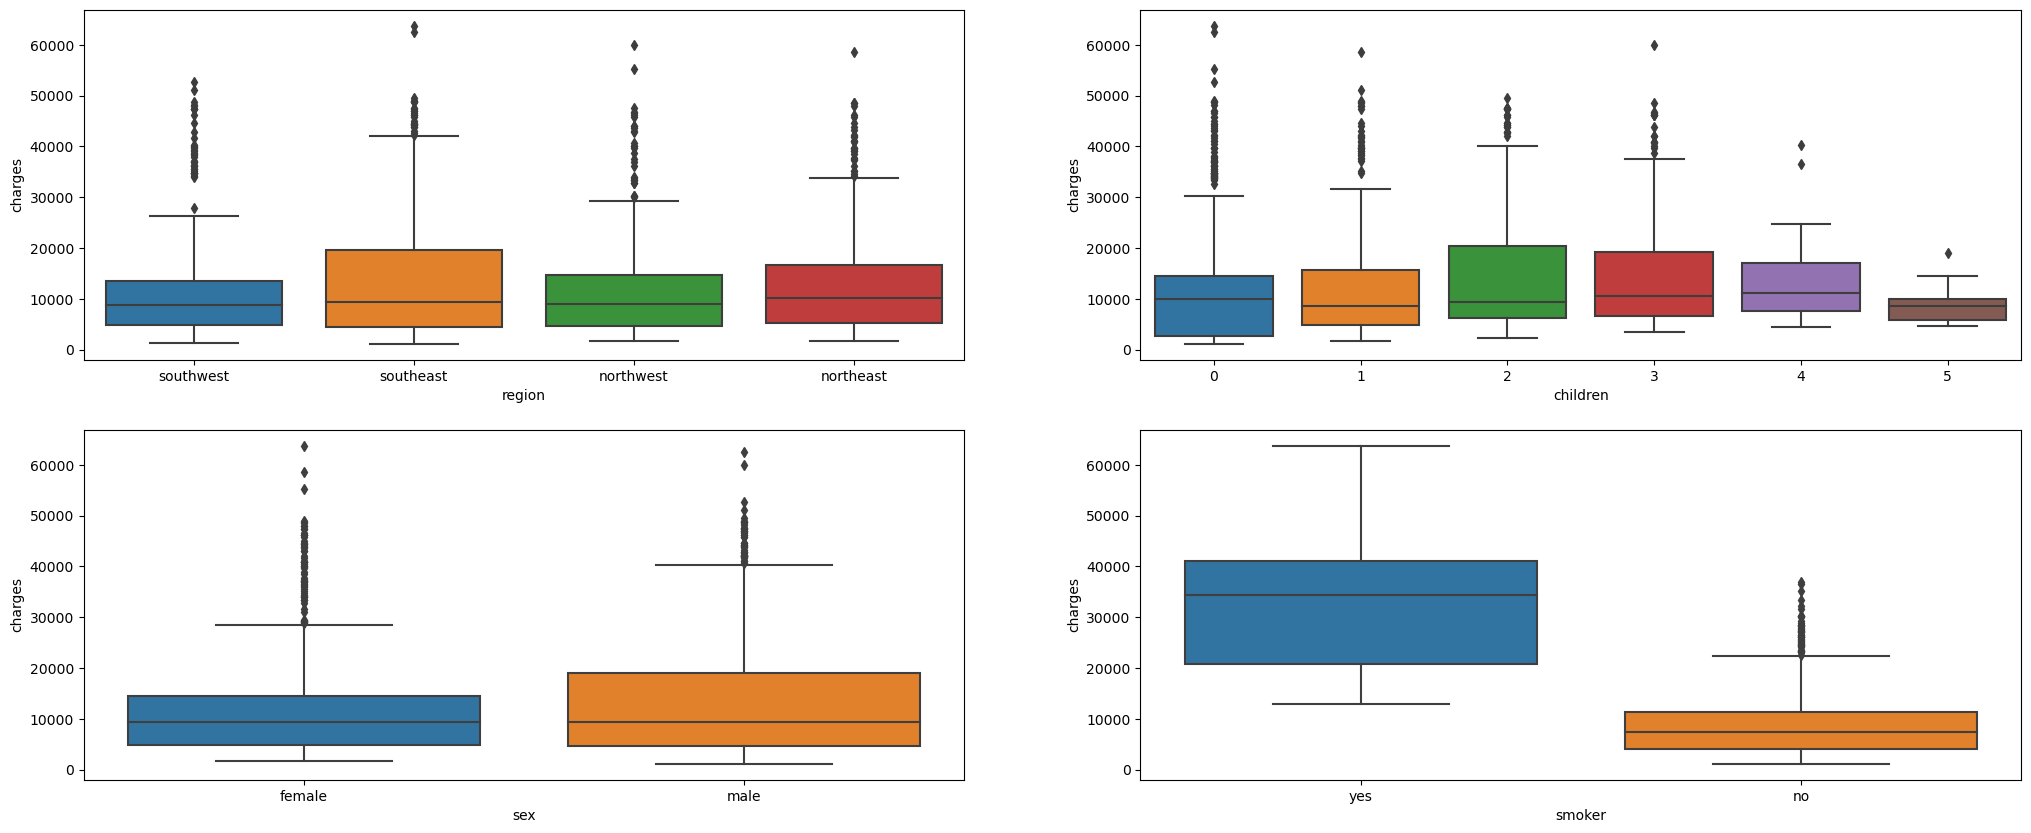

In [6]:
plt.figure (figsize = (25,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'region', y = 'charges', data = insurance_dataset)

plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = insurance_dataset)

plt.subplot(2,2,3)
sns.boxplot(x = 'sex', y = 'charges', data = insurance_dataset)

plt.subplot(2,2,4)
sns.boxplot(x = 'smoker', y = 'charges', data = insurance_dataset)

Charges by age, bmi, and children based on smoking behavior

Text(0.5, 1.0, 'Number of children vs Medical Charges')

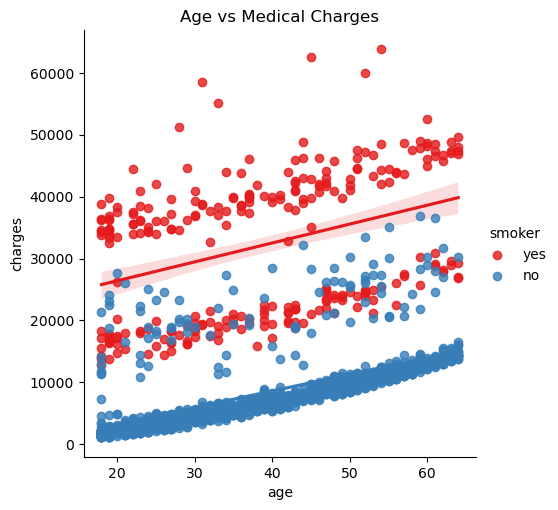

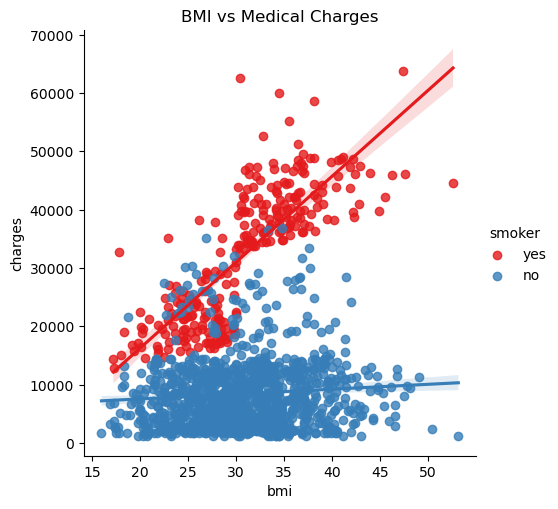

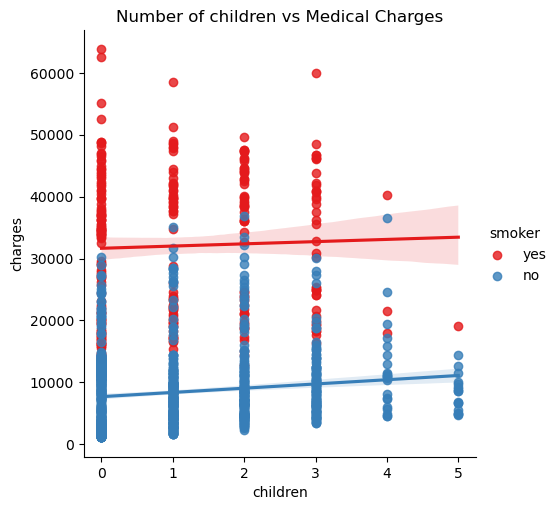

In [7]:
ax = sns.lmplot(x = 'age', y = 'charges', data = insurance_dataset, hue = 'smoker', palette = 'Set1')
plt.title('Age vs Medical Charges')

ax = sns.lmplot(x = 'bmi', y = 'charges', data = insurance_dataset, hue = 'smoker', palette = 'Set1')
plt.title('BMI vs Medical Charges')

ax = sns.lmplot(x = 'children', y = 'charges', data = insurance_dataset, hue = 'smoker', palette = 'Set1')
plt.title('Number of children vs Medical Charges')

Data Correlation

In [8]:
# Converting data to categorical type data
insurance_dataset[['region','sex','smoker']] = insurance_dataset[['region','sex','smoker']].astype('category')
insurance_dataset.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [9]:
# Converting Data to numerical type using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

label.fit(insurance_dataset.region.drop_duplicates())
insurance_dataset.region = label.transform(insurance_dataset.region)

label.fit(insurance_dataset.sex.drop_duplicates())
insurance_dataset.sex = label.transform(insurance_dataset.sex)

label.fit(insurance_dataset.smoker.drop_duplicates())
insurance_dataset.smoker = label.transform(insurance_dataset.smoker)

insurance_dataset.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

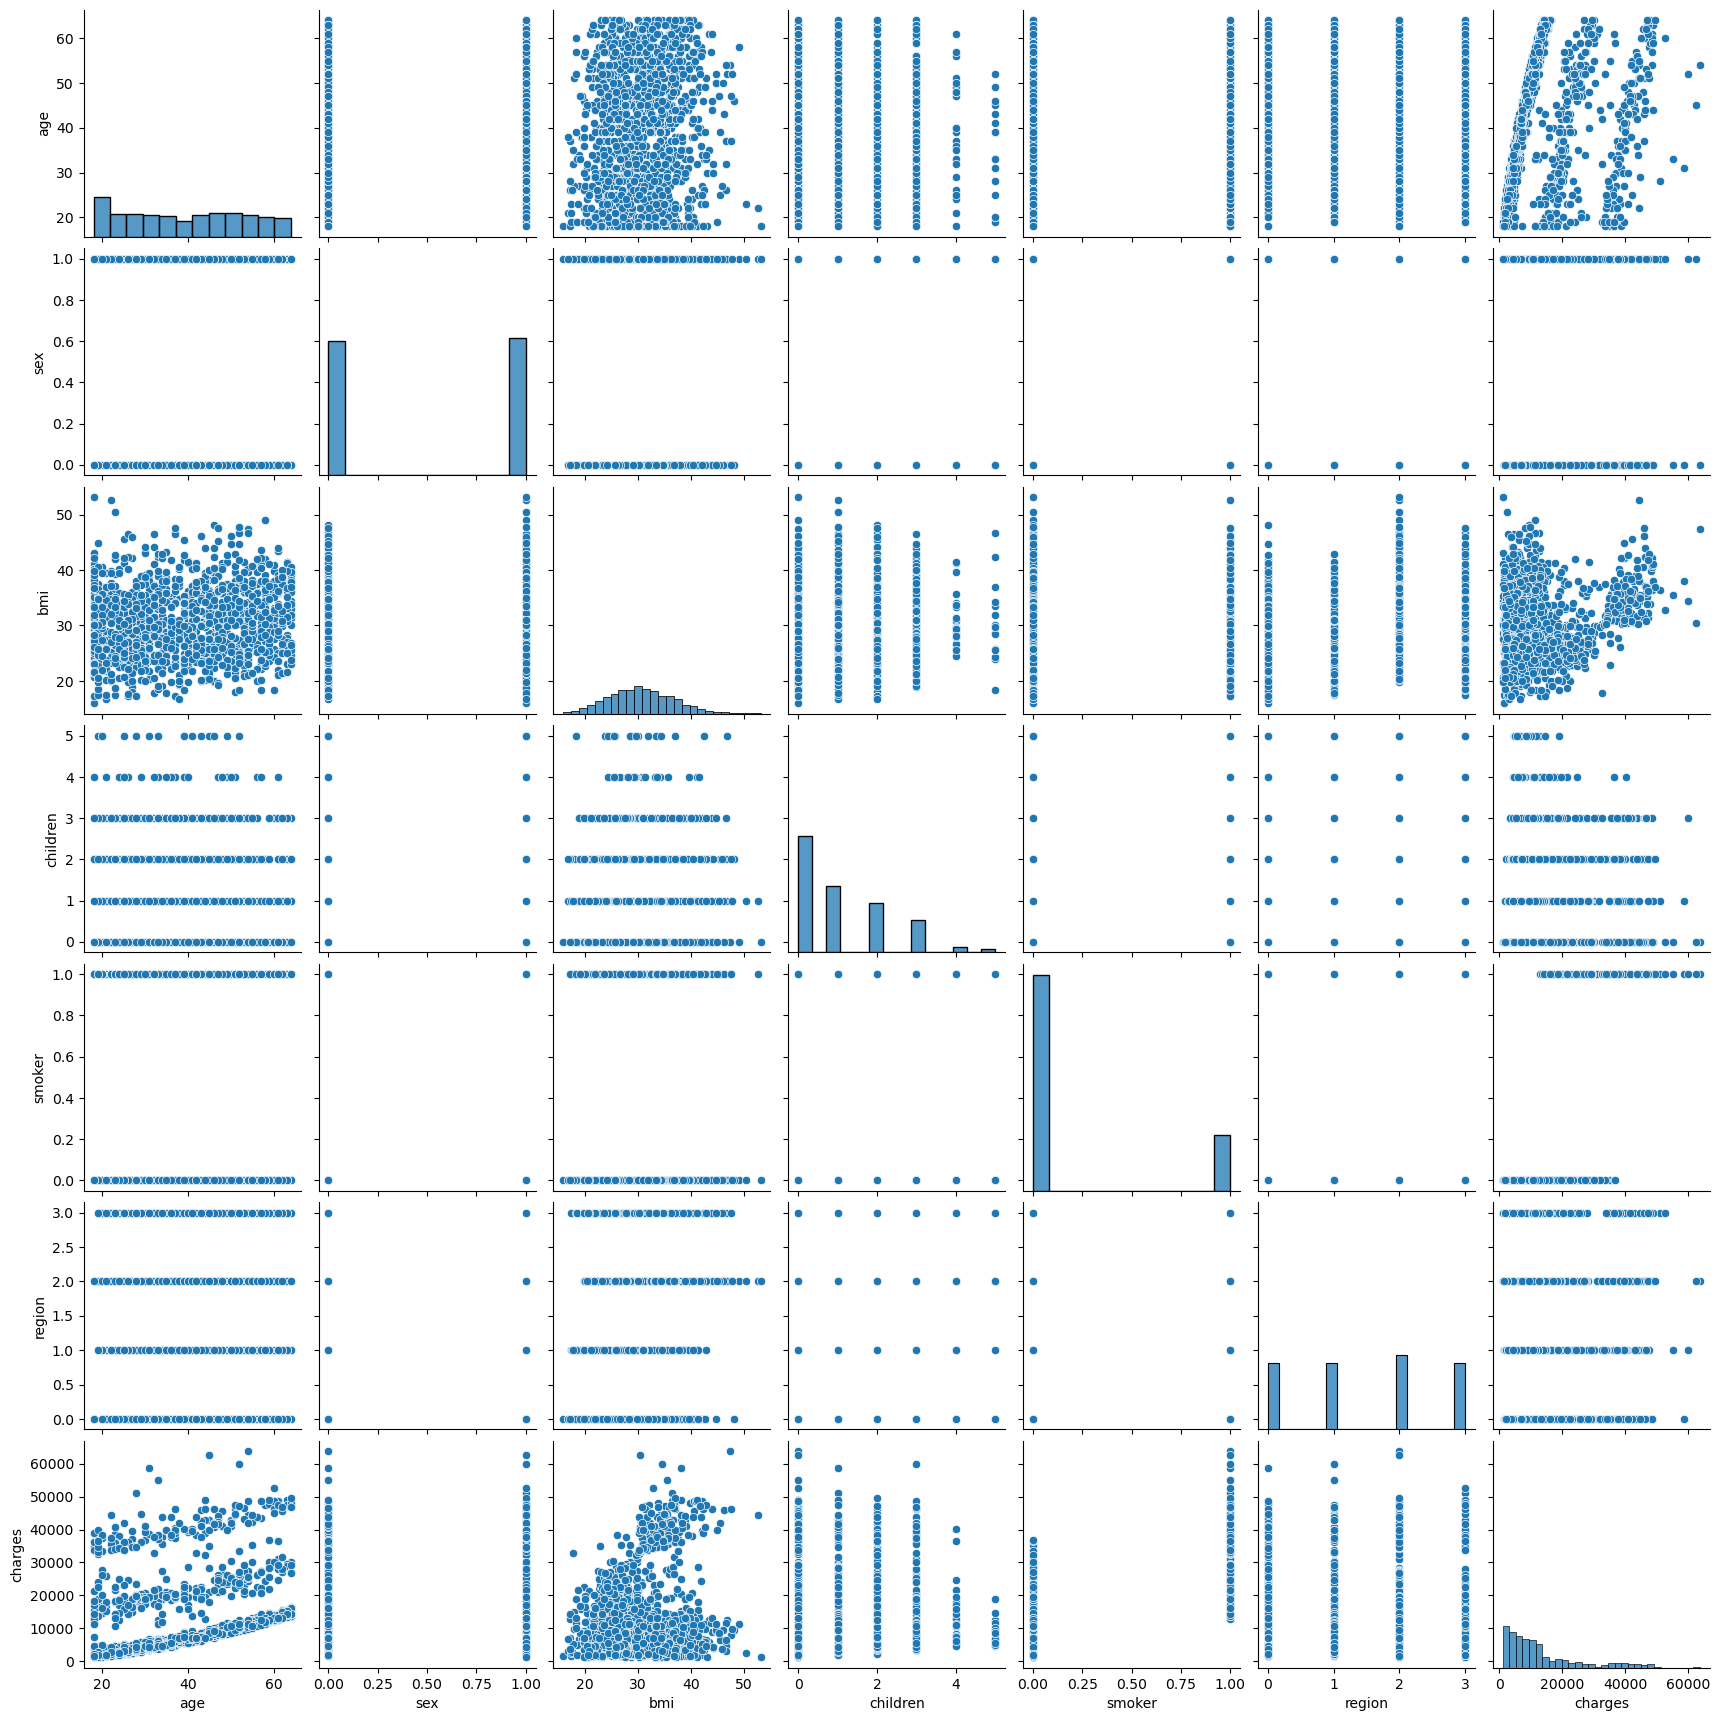

In [10]:
sns.pairplot(insurance_dataset)

Text(0.5, 1.0, 'Correlation Factors Heat Map')

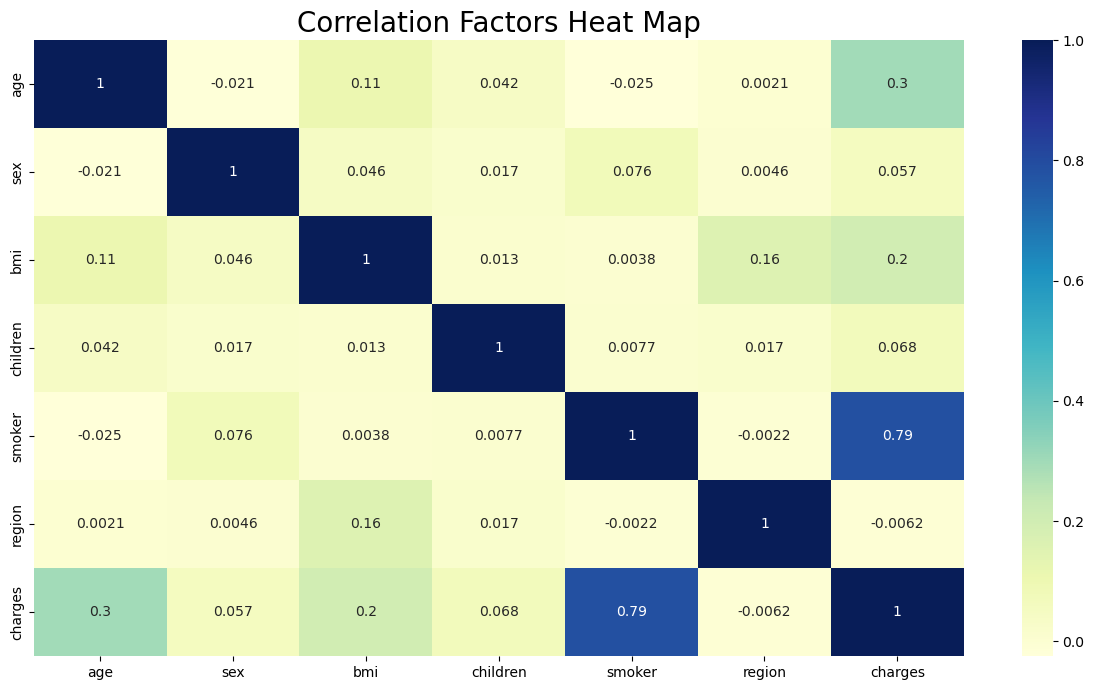

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(insurance_dataset.corr(), annot = True, cmap = 'YlGnBu').set_title('Correlation Factors Heat Map', size = '20')